In [38]:
from __future__ import division
import os
import sys

from collections import defaultdict

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

from psycopg2 import connect

from IPython.display import display
from ipywidgets import *

In [2]:
df = pd.read_csv('/DATA/raw/dbpshp/snp_annot.txt', header=None, names=['chrom','chrom_pos','rsid','gene','fx'], sep='\t')
print df.shape

(24060, 5)


In [3]:
df.head()

,chrom,chrom_pos,rsid,gene,fx
0,1,864938,rs78370858,SAMD11,intron-variant
1,1,1140435,rs1815606,TNFRSF18,intron-variant
2,1,1209636,rs3737722,"LOC101928895,UBE2J2","nc-transcript-variant,upstream-variant-2KB"
3,1,1210471,rs11260577,"LOC101928895,UBE2J2","nc-transcript-variant,upstream-variant-2KB"
4,1,1211292,rs6685064,LOC101928895,intron-variant


In [4]:
df[pd.isnull(df['rsid'])]

,chrom,chrom_pos,rsid,gene,fx


In [5]:
df[(df['chrom'] == 10) &  (df['chrom_pos'] == 103340449)]

,chrom,chrom_pos,rsid,gene,fx
17452,10,103340449,rs3095795,POLL,intron-variant


In [6]:
fxCount = defaultdict(int)
for ix,row in df.iterrows():
    try:
        for f in row['fx'].split(','):
            fxCount[f] += 1
    except AttributeError:
        fxCount[np.nan] += 1

In [7]:
for f,c in sorted(fxCount.items(), key=lambda x:x[1], reverse=True):
    print '{}\t{}'.format(c,f)

13994	intron-variant
8985	nan
852	upstream-variant-2KB
510	nc-transcript-variant
387	utr-variant-3-prime
252	downstream-variant-500B
222	reference
132	utr-variant-5-prime
122	synonymous-codon
107	missense
2	splice-acceptor-variant
1	stop-gained
1	stop-lost
1	splice-donor-variant


In [8]:
geneList = set()
for ix,row in df[pd.notnull(df['gene'])].iterrows():
    [geneList.add(g) for g in row['gene'].split(',')]
        

In [9]:
len(geneList)

3793

In [10]:
print '\n'.join(list(geneList))

RNF14
GTF2I
FHIT
MIR6082
LOC107984696
HSPA9
GALC
TYW1B
RUBCN
PKP4-AS1
LOC105370752
LURAP1L-AS1
LOC107985811
SLC50A1
OSMR-AS1
HKDC1
SPR
ZNF704
SPTLC2
SPTLC1
KDM2A
TMEM57
LOC105376016
NSRP1
LOC105369325
MUC2
CRB1
POLR3GL
CAMKV
GOLIM4
LOC105376755
RIC1
CEP85
FAM188B
FGF12-AS1
TRAPPC9
ZNF672
ZNF670
LOC107983981
PARP15
FAM183A
ERI3
PPP1R14C
MTMR10
MAL
ITGA9
RPS6KC1
EVL
ATP2A2
LOC105374540
LOC105372143
ITGA6
ITGA7
TSNAXIP1
MGST3
LRP11
DENND4A
EDC4
ZNF664-FAM101A
LILRB5
XPO5
CSDE1
LOC401478
LOC101927437
PGR
LOC105378800
PSMG4
SOBP
SEMA4F
FBXL19
KCNIP4
KCNIP1
SDK1
PRSS53
MPV17
IQCF5-AS1
CHST8
MOGAT1
LOC105376402
HMCN2
HMCN1
TACR1
KCNH5
KCNH7
LOC105376496
KCNH3
PISD
PPIC
KCNH8
TOP1
PREP
RAG1
ITGAL
ITGAM
UTP20
LOC105377067
UHRF1BP1L
DCST2
DCST1
EXOC5
METTL2A
JAZF1
TRERF1
SMAD1
VAPA
LINC01693
NDUFAF6
C14
LOC100505841
NDUFAF2
SNORA73A
SNORA73B
TMPRSS11E
TMPRSS11F
MIR4471
PELI1
MAP1S
NETO1
LOC107986643
SNTB1
SLC36A2
SLC36A1
ELMSAN1
LOC101929028
LOC101928004
AIG1
LOC105372697
ART3
MYLK4
LOC105375530

In [11]:
with open('/DATA/raw/dbpshp/gene_list.txt', 'w') as fh:
    fh.write('\n'.join(list(geneList)))

In [17]:
with open('/DATA/raw/EP/max/dbpshp.txt', 'w') as fh:
    for ix,row in df.iterrows():
        fh.write('chr{}:{}\n'.format(row['chrom'],row['chrom_pos']-1))

In [18]:
print ','.join(df['rsid'])

rs78370858,rs1815606,rs3737722,rs11260577,rs6685064,rs6603788,rs2144440,rs1739855,rs2477782,rs11260584,rs12142199,rs1077906,rs9439462,rs12032637,rs9782915,rs10752728,rs12072073,rs10909901,rs2651888,rs2251098,rs371605,rs1695626,rs1763326,rs707579,rs707580,rs9724874,rs12076190,rs4072521,rs4072522,rs4412595,rs3935073,rs902356,rs754346,rs11121667,rs7542158,rs6704113,rs7545470,rs11121674,rs11121676,rs2744815,rs7514440,rs763821,rs12385690,rs6429768,rs6429769,rs10927831,rs10927836,rs7539884,rs35449927,rs6701500,rs10927849,rs12730950,rs9442235,rs10803419,rs6603867,rs7546135,rs1890746,rs1890747,rs6586573,rs912101,rs1572791,rs1572790,rs2077398,rs1033846,rs6658566,rs1832787,rs60965885,rs9651255,rs10907304,rs12134352,rs11260977,rs11260981,rs6663855,rs10796446,rs6704504,rs4920520,rs10917498,rs16824489,rs2796354,rs2077271,rs4654773,rs6658920,rs10917067,rs8179386,rs8179387,rs7537004,rs1561624,rs2817904,rs4655134,rs7554093,rs755395,rs755394,rs906293,rs12118573,rs6690053,rs3091242,rs666686,rs12027135,r

In [12]:
df.head()

,chrom,chrom_pos,rsid,gene,fx
0,1,864938,rs78370858,SAMD11,intron-variant
1,1,1140435,rs1815606,TNFRSF18,intron-variant
2,1,1209636,rs3737722,"LOC101928895,UBE2J2","nc-transcript-variant,upstream-variant-2KB"
3,1,1210471,rs11260577,"LOC101928895,UBE2J2","nc-transcript-variant,upstream-variant-2KB"
4,1,1211292,rs6685064,LOC101928895,intron-variant


In [13]:
conn = connect(database='clinic', host='mypeg-71.igem.temple.edu', user='mypeg_lab_access', password='MegA26!')
cur = conn.cursor()

In [14]:
colNames = [c for c in "chrom,chrom_pos,snpid_in_dbsnp,snpid_in_paper,pmid,pvalue,phenotype,paper_phenotype_description,paper_phenotype_categories,title,in_gene,dbsnp_fx".split(',')]

In [15]:
%%time
pb = IntProgress(width='800px', bar_style='info')
pb.value = 0
pb.max = df.shape[0]
ph = HTML('{} / {}'.format(pb.value, pb.max))
display(pb,ph)

gwas = []
for ix,row in df.iterrows():
    query = """
            SELECT
                chrom,chrom_pos,snpid_in_dbsnp,snpid_in_paper,pmid,pvalue,phenotype,paper_phenotype_description,paper_phenotype_categories,title,in_gene,dbsnp_fxn
            FROM
                grasp_online.grasp_prime
            WHERE
                (chrom = '{}') AND
                (chrom_pos = {})
    """.format(row['chrom'], row['chrom_pos'])
    cur.execute(query)
    if cur.rowcount > 0:
        res = map(dict,[zip(colNames,vals) for vals in cur.fetchall()])
        gwas.extend(res)
    pb.value += 1
    ph.value = '{} / {}'.format(pb.value,pb.max)

CPU times: user 29.5 s, sys: 3.02 s, total: 32.5 s
Wall time: 1min 28s


In [16]:
dbpshpGwas = pd.DataFrame(gwas, columns=colNames)

In [18]:
from re import IGNORECASE

In [38]:
dbpshpGwas[dbpshpGwas['paper_phenotype_categories'].str.contains('climate', flags=IGNORECASE)]

,chrom,chrom_pos,snpid_in_dbsnp,snpid_in_paper,pmid,pvalue,phenotype,paper_phenotype_description,paper_phenotype_categories,title,in_gene,dbsnp_fx


In [19]:
dbpshpGwas.head()

,chrom,chrom_pos,snpid_in_dbsnp,snpid_in_paper,pmid,pvalue,phenotype,paper_phenotype_description,paper_phenotype_categories,title,in_gene,dbsnp_fx
0,1,1140435,1815606,rs1815606,20686565,0.02101,Total cholesterol,Lipid level measurements,CVD risk factor (CVD RF);Lipids,"Biological, clinical and population relevance ...",(TNFRSF18),Intron
1,1,1140435,1815606,rs1815606,19060906,0.01939,Triglycerides,Lipid level measurements,CVD risk factor (CVD RF);Lipids,Common variants at 30 loci contribute to polyg...,(TNFRSF18),Intron
2,1,1140435,1815606,rs1815606,22685416,0.0000153,Gene expression of TNFRSF18 (probeID ILMN_2349...,Gene expression in brain (cerebellum and tempo...,Quantitative trait(s);Gene expression (RNA);Neuro,Brain expression genome-wide association study...,(TNFRSF18),Intron
3,1,1140435,1815606,rs1815606,20339536,0.024020822,Total cholesterol change with statins,"Response to statin treatment (simvastatin, pra...",Drug response;Quantitative trait(s);CVD risk f...,Genome-wide association of lipid-lowering resp...,(TNFRSF18),Intron
4,1,1140435,1815606,rs1815606,22295056,0.00955,Acute lung injury following major trauma,Acute lung injury following major trauma,Pulmonary;Wound,Genome wide association identifies PPFIA1 as a...,(TNFRSF18),Intron


In [105]:
# phenos = set()
# descs = set()
cats = defaultdict(int)

for ix,row in dbpshpGwas.iterrows():
#     phenos.add(row['phenotype'])
#     descs.add(row['paper_phenotype_description'])
    for x in row['paper_phenotype_categories'].split(';'):
        cats[x] += 1

In [107]:
len(cats)

160

In [109]:
print '\n'.join(['{}\t{}'.format(x,cats[x]) for x in sorted(cats, key=lambda x:cats[x], reverse=True)])

Quantitative trait(s)	42595
CVD risk factor (CVD RF)	27980
Lipids	18051
Blood-related	15340
Neuro	14478
Drug response	10534
Gene expression (RNA)	7790
Type 2 diabetes (T2D)	7553
Renal	6428
Weight	5852
Eye-related	5708
Developmental	5549
Aging	4101
Chronic kidney disease	3898
Cognition	3639
Inflammation	3600
Blood pressure	3561
Social	3527
Serum	3527
Age-related macular degeneration (ARMD)	3370
Body mass index	2948
Behavioral	2802
Cardiovascular disease (CVD)	2722
Heart	2569
Gender	2558
Valve	2526
Urinary	2497
Pregnancy-related	2444
Height	2383
Arterial	2241
Subclinical CVD	2224
Male	2223
Calcium	2201
Arthritis	2201
Rheumatoid arthritis	2163
Infection	2108
Female	1978
Depression	1943
Bipolar disorder	1648
Reproductive	1638
Cell line	1418
Adipose-related	1413
Parkinson's disease	1235
Pulmonary	1177
Mortality	1158
Anthropometric	1063
Epigenetics	981
Methylation	978
Gastrointestinal	836
Cancer	694
Addiction	686
Immune-related	685
Bone-related	684
Crohn's disease	656
Alzheimer's disease	604

In [23]:
pd.unique(dbpshpGwas['snpid_in_dbsnp']).shape

(20667,)

In [86]:
gwas = dbpshpGwas.sort_values(by=['chrom','chrom_pos','pvalue'])

In [87]:
gwas['chrom'] = gwas.apply(lambda x:'chr{}'.format(x['chrom']), axis=1)

In [88]:
gwas.head(20)

,chrom,chrom_pos,snpid_in_dbsnp,snpid_in_paper,pmid,pvalue,phenotype,paper_phenotype_description,paper_phenotype_categories,title,in_gene,dbsnp_fx
2,chr1,1140435,1815606,rs1815606,22685416,0.0000153,Gene expression of TNFRSF18 (probeID ILMN_2349...,Gene expression in brain (cerebellum and tempo...,Quantitative trait(s);Gene expression (RNA);Neuro,Brain expression genome-wide association study...,(TNFRSF18),Intron
5,chr1,1140435,1815606,rs1815606,20686565,0.005349,LDL cholesterol,Lipid level measurements,CVD risk factor (CVD RF);Lipids,"Biological, clinical and population relevance ...",(TNFRSF18),Intron
4,chr1,1140435,1815606,rs1815606,22295056,0.00955,Acute lung injury following major trauma,Acute lung injury following major trauma,Pulmonary;Wound,Genome wide association identifies PPFIA1 as a...,(TNFRSF18),Intron
1,chr1,1140435,1815606,rs1815606,19060906,0.01939,Triglycerides,Lipid level measurements,CVD risk factor (CVD RF);Lipids,Common variants at 30 loci contribute to polyg...,(TNFRSF18),Intron
0,chr1,1140435,1815606,rs1815606,20686565,0.02101,Total cholesterol,Lipid level measurements,CVD risk factor (CVD RF);Lipids,"Biological, clinical and population relevance ...",(TNFRSF18),Intron
3,chr1,1140435,1815606,rs1815606,20339536,0.024020822,Total cholesterol change with statins,"Response to statin treatment (simvastatin, pra...",Drug response;Quantitative trait(s);CVD risk f...,Genome-wide association of lipid-lowering resp...,(TNFRSF18),Intron
6,chr1,1210471,11260577,rs11260577,23562823,0.0406,Diabetic retinopathy in Type 2 diabetes mellitus,Retinopathy (diabetic retinopathy),Eye-related;Type 2 diabetes (T2D),Genome-wide association study in a Chinese pop...,None,5' of gene within 2000bp
12,chr1,1211292,6685064,rs6685064,21283786,1.53E-19,Gene expression of AURKAIP1 [probe ILMN_28786]...,Gene expression in treated osteoblasts,Quantitative trait(s);Gene expression (RNA);Bo...,Global analysis of the impact of environmental...,None,None
16,chr1,1211292,6685064,rs6685064,21283786,0.00000896,Gene expression of B3GALT6 [probe ILMN_21885] ...,Gene expression in treated osteoblasts,Quantitative trait(s);Gene expression (RNA);Bo...,Global analysis of the impact of environmental...,None,None
15,chr1,1211292,6685064,rs6685064,21829388,0.000012,Gene expression of SDF4 in blood,Gene expression in blood cells,Quantitative trait(s);Gene expression (RNA);Bl...,Trans-eQTLs Reveal That Independent Genetic Va...,None,None


In [89]:
pd.unique(gwas['dbsnp_fx'])

array(['Intron', "5' of gene within 2000bp", None, 'Synonymous',
       'Missense', "3'UTR", "3' of gene within 500bp", "5'UTR",
       'Intron;Missense', "3'UTR;Intron", "3'UTR;Missense", "5'UTR;Intron",
       "5' donor splice site", 'Intron;Synonymous', 'Synonymous,Missense',
       'Synonymous,Missense,Frameshift', "3'UTR;Synonymous"], dtype=object)

In [90]:
bestGwas = gwas.drop_duplicates(subset=['chrom','chrom_pos'])

In [91]:
bestGwas['neg_log10_p'] = np.multiply(-1, np.log10(bestGwas['pvalue']))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [92]:
def label_bars(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() +  rect.get_width()/2, height+100, '{:.0f}'.format(height), ha='center', va='center')

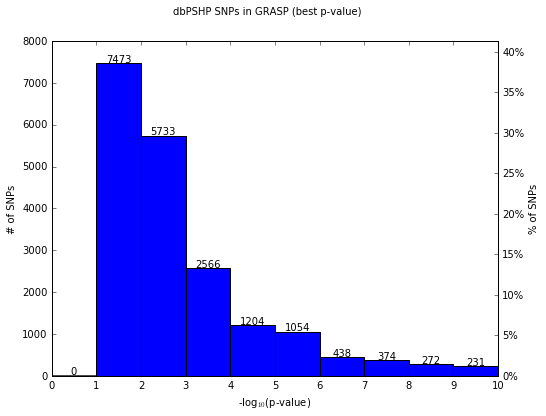

In [93]:
fig,ax = plt.subplots(1,1, figsize=(8,6), facecolor='#FFFFFF')

hist,bins,rects = ax.hist(bestGwas['neg_log10_p'].astype(float), bins=np.linspace(0,10,11))

ax.set_xticks(range(11))
ax.set_ylim(0,8000)
yticks = ax.get_yticks()
ax.set_xlabel('-log$_{10}$(p-value)')
ax.set_ylabel('# of SNPs')

sumHist = sum(hist)
ax2 = ax.twinx()
ax2.set_ylim(0,yticks[-1]/sumHist)
yticks2 = ax2.get_yticks()
ax2.set_yticklabels(['{:d}%'.format(int(y*100)) for y in yticks2])
ax2.set_ylabel('% of SNPs')

fig.suptitle('dbPSHP SNPs in GRASP (best p-value)')

label_bars(ax, rects)

In [94]:
bestGwas.to_csv('/DATA/raw/dbpshp/gwas_best.txt', sep='\t', index=False)

In [99]:
np.sum(bestGwas['neg_log10_p']>-1*np.log10(0.05))

20654